# Regional Generation of Renewable Energy

In this notebook, we show how the renewable energy mix available to the user greatly depends on the region.
We use Germany as an example, but this applies to all countries and regions.



## Data loading, processing, and plotting functions

In [3]:
import pandas as pd
import seaborn as asn
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

# for visualizing locations on maps
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.io import shapereader
import geopandas
import shapely

####
# Helper Functions
####

# Visualization function provided by the Open Power System
def visualize(latitudes, longitudes, country, categories=None, eps=0.03, outname = ""):
    # Remove the locations not in Europe
    european_latitude_mask = np.logical_and(latitudes >= 34, latitudes <= 81)
    european_longitude_mask= np.logical_and(longitudes >= -31, longitudes <= 69)
    european_mask = np.logical_and(european_latitude_mask, european_longitude_mask)
    latitudes = latitudes[european_mask]
    longitudes = longitudes[european_mask]
    if categories is not None:
        categories = categories[european_mask]
        
    # Determine the coordinates of boundary locations
    max_lat = latitudes.max()
    min_lat = latitudes.min()

    max_lon = longitudes.max()
    min_lon = longitudes.min()
    
    # Make the area to show a bit larger
    max_lat = max_lat + (max_lat - min_lat) * eps
    min_lat = min_lat - (max_lat - min_lat) * eps
    
    max_lon = max_lon + (max_lon - min_lon) * eps
    min_lon = min_lon - (max_lon - min_lon) * eps
    
    # Get the shape file for visualizing countries
    shp_filename = shapereader.natural_earth('10m', 'cultural', 'admin_0_countries')
    
    df_geo = geopandas.read_file(shp_filename)
    
    polygon = df_geo.loc[df_geo['ADMIN'] == country]['geometry'].values[0]
    # Make sure that polygon is technically multi-part
    # (see https://github.com/SciTools/cartopy/issues/948)
    if type(polygon) == shapely.geometry.polygon.Polygon:
        polygon=[polygon]
    # Make the figure
    figure(num=None, figsize=(8, 6), dpi=100, facecolor='white', edgecolor='k')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_geometries(polygon, crs=ccrs.PlateCarree(), facecolor='white', edgecolor='0.5', zorder=1)
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='10m', color='black')

    
    # Plot the locations
    if categories is None:
        ax.scatter(longitudes, latitudes, s=1.5, zorder=2, c='#123456')
    else:
        labels = categories.unique()
        for label in labels:
            category_mask = (categories == label)
            latitude_subset = latitudes[category_mask]
            longitude_subset = longitudes[category_mask]
            ax.scatter(longitude_subset, latitude_subset, s=1.5, zorder=2, label=label)
        ax.legend()
    #ax.figure.savefig(outname, dpi =300)    
    
    # Show the figure
    plt.show()
    
# Load the data
de_plants = "../opsd-renewable_power_plants-2019-04-05/renewable_power_plants_DE.csv"
df = pd.read_csv(de_plants)

C:\Users\kevin\anaconda3\envs\green\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Hydro power in Germany

In Germany, hydro power plants are most abundant in the sout and also i nparts of middle germany, but almost compeletely absent from the east and the north.

C:\Users\kevin\anaconda3\envs\green\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\kevin\anaconda3\envs\green\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less_equal
C:\Users\kevin\anaconda3\envs\green\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\kevin\anaconda3\envs\green\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less_equal


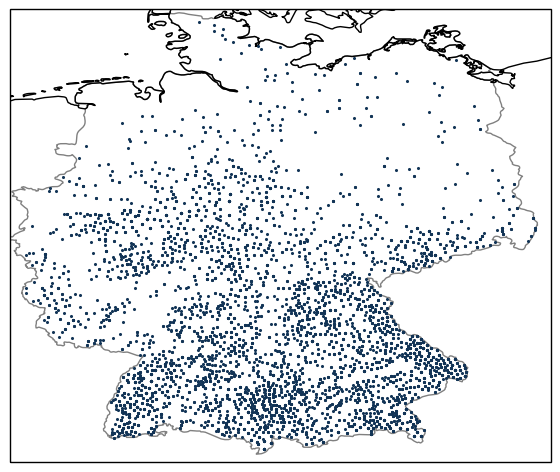

In [4]:
# Visualize hydro power
hydro = df.loc[df.energy_source_level_2 == "Hydro"]
lats = np.array(hydro['lat'])
longs = np.array(hydro['lon'])
country = "Germany"
visualize(lats, longs, country)

# Wind power in Germany

Wind energy plants are built all over Germany, but several areas have low density, while others have high densities.
It is important to include these regional density differences in a energy prediction model to provide the most accurate predictions with the highest regional resolution

C:\Users\kevin\anaconda3\envs\green\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\kevin\anaconda3\envs\green\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less_equal
C:\Users\kevin\anaconda3\envs\green\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\kevin\anaconda3\envs\green\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less_equal


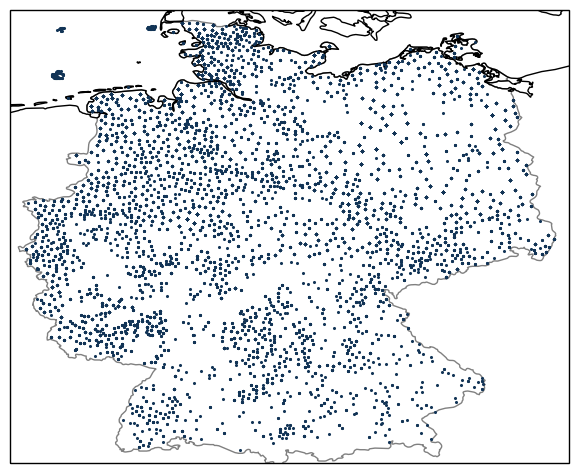

In [5]:
# Visualize wind power
wind = df.loc[df.energy_source_level_2 == "Wind"]
lats = np.array(wind['lat'])
longs = np.array(wind['lon'])
country = "Germany"
visualize(lats, longs, country)

# Solar power in Germany
Similar to Wind energy, solar energy has large variations in density throughout Germany. The Sout-West has areas of very high density, while solar plants can be relatively scarce in some areas of East-Germany.

C:\Users\kevin\anaconda3\envs\green\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\kevin\anaconda3\envs\green\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less_equal
C:\Users\kevin\anaconda3\envs\green\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\kevin\anaconda3\envs\green\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less_equal


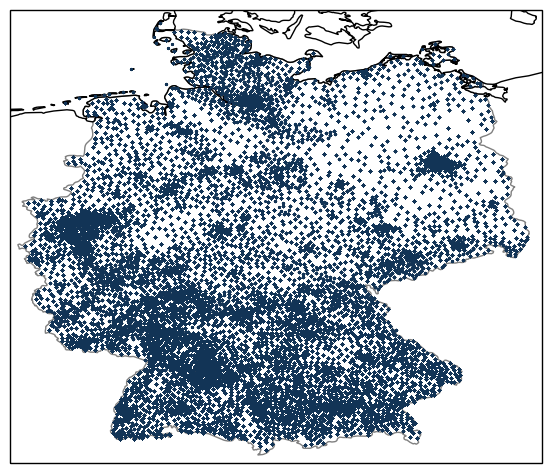

In [6]:
# Visualize solar power
solar = df.loc[df.energy_source_level_2 == "Solar"]
lats = np.array(solar['lat'])
longs = np.array(solar['lon'])
country = "Germany"
visualize(lats, longs, country)